# Linear Algebra

## Vectors
Vector is a geometric object that has magnitude (or length) and direction. Vectors can be added to other vectors according to vector algebra. Concretely, vectors are points in some finite-dimensional space.

In [1]:
from typing import List, Dict, Tuple, Callable, TypeVar, Iterator, NamedTuple, Set, Iterable


Vector = List[float]

height_weight_age = [70,  # inches,
                     170, # pounds,
                     40]  # years

grades = [95, # exam1
          80, # exam2
          75, # exam3
          62] # exam4

### Vector arithmetic

In [2]:
def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"
    
    return [v_i + w_i for v_i, w_i in zip(v, w)]


add([1,2,3],[4,5,6])

[5, 7, 9]

In [3]:
def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"
    
    return [v_i - w_i for v_i, w_i in zip(v, w)]


subtract([1,2,3],[4,5,6])

[-3, -3, -3]

In [4]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    assert vectors, "no vectors provided!"
    
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"
    
    return [sum(vector[i] for vector in vectors) for i in range(num_elements)]


vector_sum([[1,2],[3,4],[5,6],[7,8]])

[16, 20]

In [5]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]


scalar_multiply(2,[1,2,3])

[2, 4, 6]

In [6]:
def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))


vector_mean([[1,2],[3,4],[5,6]])

[3.0, 4.0]

In [7]:
def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectos must be same length"
    
    return sum(v_i * w_i for v_i, w_i in zip(v,w))


dot([1, 2, 3], [4, 5, 6]) # 1*4 + 2*5 + 3*6

32

If w has magnitude 1, the dot product measures how far the vector v extends in the w direction. For example, if w = [1, 0], then dot(v,w) is just the first component of v. Another way of saying this is that it's the length of the vector you'd get if you projected v onto w.

In [8]:
def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n + v_n"""
    return dot(v,v)


sum_of_squares([1,2,3])

14

In [9]:
import math

def magnitude(v: Vector) -> float:
    """Returns the magnitude (or length) of v"""
    return math.sqrt(sum_of_squares(v)) # math.sqrt is square root funtion


magnitude([3,4])

5.0

To compute the distance between two vectors: $$\sqrt{(v_1 - w_1)^2 + ... + (v_n - w_n)^2}$$

In [10]:
def squared_distance(v: Vector, w: Vector) -> Vector:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v,w))

def distance(v: Vector, w: Vector) -> Vector:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v,w))

#alternative
def distance(v: Vector, w: Vector) -> Vector:
    return magnitude(subtract(v,w))

distance([3,4],[9,12])

10.0

## Matrices

In [11]:
Matrix = List[List[float]]

A = [[1,2,3],
     [4,5,6]]

B = [[1,2],
     [3,4],
     [5,6]]

In [12]:
def shape(A: Matrix) -> Tuple[int,int]:
    """Returns (# of rows of A, # of columns of A)"""
    num_rows = len(A)
    num_columns = len(A[0]) if A else 0
    return num_rows, num_columns

shape(A)

(2, 3)

In [13]:
def get_row(A: Matrix, i: int) -> Vector:
    """Returns the i-th row of A (as a Vector)"""
    return A[i]

def get_column(A: Matrix, j: int) -> Vector:
    """Returns the j-th column of A (as a Vector)"""
    return [A_i[j] for A_i in A]

def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    """Returns a num_rows x num_cols matrix whose (i,j)-th entry is entry_fn(i,j)"""
    return [[entry_fn(i,j) for j in range(num_cols)] for i in range(num_rows)]

def identity_matrix(n: int) -> Matrix:
    """Returns the n x n identity matrix"""
    return make_matrix(n,n, lambda i, j: 1 if i==j else 0)

identity_matrix(5)

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

# statistics

In [14]:
import math

def mean(xs: Vector) -> float:
    return sum(xs) / len(xs)

def de_mean(xs: Vector) -> Vector:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: Vector) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(xs: Vector) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

def covariance(xs: Vector, ys: Vector) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

def correlation(xs: Vector, ys: Vector) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero

# Gradient Descent

In machine learning we frequently will need to maximize or minimize functions that take as input a vector of real numbers and output a single real number. For functions like this, the gradient (if you remember your calculus, this is the vector of partial derivatives) gives the direction in which the function most quickly increases. Accordingly, one approach to maximize a function is to take a pick a random starting point, compute the gradient, take a small step in the direction of the gradient (i.e., the direction that causes the function to increase the most), and repeat with the new starting point. Similarly, you can try to minimize a function by taking small steps in the opposite direction.

If a function has a unique global minimum, this procedure is likely to find it. If a function has multiple (local) minima, this procedure might "find" the wrong one of them, in which case you might rerun the procedure from different starting points. If a function has no minimum, then it's possible the procedure might go on forever.

Wikipedia: In numerical mathematics, numerical differentiation is the approximate calculation of the derivative from given function values, usually by means of a difference quotient. This is necessary if the derivative function is not given or the function itself is only available indirectly, for example via measured values. 

In [15]:
def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

When f is a function of many variables, it has multiple partial derivatives, each indicating how f changes when we make small changes in just one of the input variables. We calculate its ith partial derivative by treating it as a function of just its ith variable, holding the other variables fixed.

In [16]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the i-th partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

## Using the Gradient

To compute the minimum for the sum_of_squares function (obviously it is 0).

In [17]:
import random

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves 'step_size' in the 'gradient' direction from 'v'"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

# to compute the gradient directly
def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

In [18]:
# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = estimate_gradient(sum_of_squares, v)
    v = gradient_step(v, grad, -0.01)
    if epoch % 100 == 0:
        print(epoch, v)

0 [7.064115430982113, -2.753611344339859, 2.8159964724515074]
100 [0.9367964822238486, -0.3652260826153464, 0.3734128325554842]
200 [0.12419416441412795, -0.048479489899833916, 0.04947847499671268]
300 [0.01642720590711574, -0.006472697442725336, 0.006518444358208493]
400 [0.0021351997297880997, -0.000901775282500602, 0.0008211041737050065]
500 [0.0002398002177058323, -0.00016296205968735784, 6.552544865482375e-05]
600 [-1.1566823829649716e-05, -6.498097818869402e-05, -3.467906630485518e-05]
700 [-4.4903009244663344e-05, -5.198677067425358e-05, -4.796814457745694e-05]
800 [-4.9324039349627585e-05, -5.026348464448423e-05, -4.9730536236219985e-05]
900 [-4.991035439874528e-05, -5.0034943216536596e-05, -4.996426383531776e-05]


After a certain point we stop improving our prediction. The further increase the prediction we can either reduce the stepsize or reduce h since we can no longer optimaly predict the gradient.

## Using Gradient Descent to Fit Models

Example: In this case we know the parameters of the linear relationship between x and y, but imagine we'd like to learn them from the data. We'll use gradient descent to find the slope and intercept that minimize the average squared error.

In [19]:
# ranges from - 50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

# random values for slope and intercept
theta = [random.uniform(-1,1), random.uniform(-1,1)]

learning_rate = 0.001

for epoch in range(4000):
    grad = vector_mean([linear_gradient(x,y,theta) for x,y in inputs])
    theta = gradient_step(theta,grad,-learning_rate)
    if epoch % 200 == 0:
        print(epoch, theta)
        
theta

0 [32.865541242711124, -0.05083563541509259]
200 [19.99797024183235, 1.6204514317879215]
400 [19.998639793558638, 2.7352554581886697]
600 [19.99908848177452, 3.482321607119942]
800 [19.99938916222559, 3.9829547387394117]
1000 [19.999590657897762, 4.318445153923746]
1200 [19.999725686649246, 4.543268106245071]
1400 [19.999816173772526, 4.693929220848609]
1600 [19.999876812113538, 4.794892095053462]
1800 [19.999917447822437, 4.86255057477816]
2000 [19.999944679122144, 4.907890705144991]
2200 [19.99996292769474, 4.938274589471774]
2400 [19.99997515665205, 4.958635810741188]
2600 [19.999983351670927, 4.972280522099463]
2800 [19.99998884341751, 4.981424283447915]
3000 [19.99999252361409, 4.98755181296482]
3200 [19.99999498983256, 4.991658068208115]
3400 [19.99999664252514, 4.994409802341198]
3600 [19.99999775004776, 4.996253828172644]
3800 [19.999998492234408, 4.997489569382577]


[19.99999898757338, 4.998314309070989]

# Minibatch and Stochastic Gradient Descent

In [20]:
T = TypeVar('T')

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates 'batch_size'-sized minibatches from the dataset"""
    batch_starts = [start for start in range(0,len(dataset),batch_size)]
    
    if shuffle: random.shuffle(batch_starts)
        
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [21]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    if epoch%100 == 0: print(epoch, theta)

theta

0 [18.685337066135055, 1.3280137843182587]
100 [19.718890963177525, 3.8637600672453285]
200 [19.93274004969401, 4.724512376854973]
300 [19.99176498148756, 4.949289002667753]
400 [19.999519059197674, 4.9854607496002314]
500 [19.999821302558686, 4.996616611138997]
600 [20.00010984623067, 4.999366377437945]
700 [20.00003897381826, 4.999766977068455]
800 [19.99999944559982, 4.9999236109196525]
900 [20.000003870474504, 4.999979644033054]


[19.999999650228204, 4.99999342096177]

In [22]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    if epoch%10 == 0: print(epoch, theta)

0 [20.105950611028383, -0.2733841109083178]
10 [20.068337128482014, 1.5986956640707362]
20 [20.04407706760384, 2.806177024422845]
30 [20.028429471719686, 3.5849959969687477]
40 [20.018336858275607, 4.087330040350964]
50 [20.01182717768274, 4.411332792337129]
60 [20.007628466977994, 4.6203128220461425]
70 [20.00492030933308, 4.755103815975301]
80 [20.003173584895897, 4.842043279373795]
90 [20.002046942599446, 4.898118766833173]


# k-Nearest Neighbors

Nearest neighbors is one of the simplest predictive models there is. The only things it requires are:
- some notion of distance
- an assumption that points that are close to one another are similar

In [23]:
def majority_vote(labels: List[str]) -> str:
    """Assumes that labels are ordered from nearest to farthest."""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest

In [24]:
from collections import Counter

class LabeledPoint(NamedTuple):
    point: Vector
    label: str

def knn_classify(k: int,
                 labeled_points: List[LabeledPoint],
                 new_point: Vector) -> str:

    # Order the labeled points from nearest to farthe st.
    by_distance = sorted(labeled_points,
                         key=lambda lp: distance(lp.point, new_point))

    # Find the labels for the k closest
    k_nearest_labels = [lp.label for lp in by_distance[:k]]

    # and let them vote.
    return majority_vote(k_nearest_labels)

### The Iris Dataset

contains a bunch of measurements for 150 flowers representing three species of iris. For each flower we have its petal length, petal width, sepal length, and sepal width, as well as its species.

In [25]:
import requests

data = requests.get(
  "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
)

with open('iris.dat', 'w') as f:
    f.write(data.text)

represent iris data as LabeldPoint

In [26]:
import csv
from collections import defaultdict

def parse_iris_row(row: List[str]) -> LabeledPoint:
    """sepal_length, sepal_width, petal_length, petal_width, class"""
    measurements = [float(value) for value in row[:-1]]
    label = row[-1].split('-')[-1]
    
    return LabeledPoint(measurements, label)

with open('iris.dat') as f:
    reader = csv.reader(f)
    # if row helps to ignore empty rows
    iris_data = [parse_iris_row(row) for row in reader if row]
    
# group just the points by species/label so we can plot them
points_by_species: Dict[str, List[Vector]] = defaultdict(list)
for iris in iris_data:
    points_by_species[iris.label].append(iris.point)

### plot the measurements

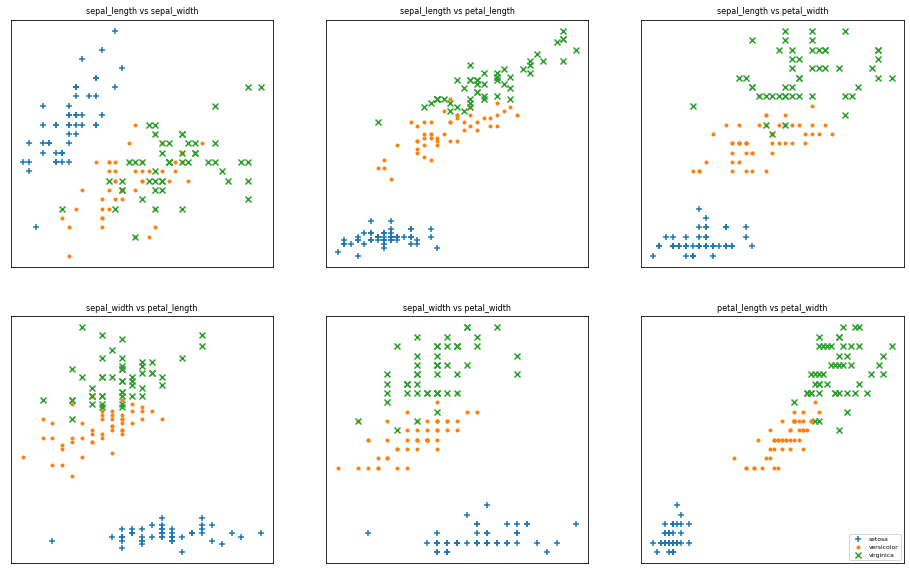

In [27]:
from matplotlib import pyplot as plt

metrics = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
pairs = [(i,j) for i in range(4) for j in range(4) if i<j]
marks = ['+', '.', 'x'] # markers for every class

fig, ax = plt.subplots(2,3, figsize=(16,10))

f
for row in range(2):
    for col in range(3):
        i, j = pairs[3*row + col]
        ax[row][col].set_title(f'{metrics[i]} vs {metrics[j]}', fontsize=8)
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
        
        for mark, (species, points) in zip(marks, points_by_species.items()):
            xs = [point[i] for point in points]
            ys = [point[j] for point in points]
            ax[row][col].scatter(xs, ys, marker=mark, label=species)
            
ax[-1][-1].legend(loc='lower right', prop={'size': 6})
plt.show()

In [28]:
X = TypeVar('X')

def split_data(data: List[X], prob: float) -> Tuple[List[X], List[X]]:
    """split data into fractions[prob, 1-prob]"""
    data = data[:] # make a shallow copy
    random.shuffle(data)
    cut = int(len(data) * prob)
    return data[:cut], data[cut:]

In [29]:
from pprint import pprint
import random
random.seed(42)

iris_train, iris_test = split_data(iris_data, 0.70)

confusion_matrix: Dict[Tuple[str,str], int] = defaultdict(int)
num_correct = 0

for iris in iris_test:
    predicted = knn_classify(5, iris_train, iris.point)
    actual = iris.label
    
    if predicted == actual:
        num_correct += 1
        
    confusion_matrix[(predicted, actual)] += 1
    
pct_correct = num_correct / len(iris_test)
print(f'pct_correct {pct_correct:.2f}')
pprint(confusion_matrix)

pct_correct 0.98
defaultdict(<class 'int'>,
            {('setosa', 'setosa'): 21,
             ('versicolor', 'versicolor'): 11,
             ('virginica', 'versicolor'): 1,
             ('virginica', 'virginica'): 12})


# The Curse of Dimensionality

In [30]:
def random_point(dim: int) -> Vector:
    return [random.random() for _ in range(dim)]

def random_distances(dim: int, num_pairs: int) -> List[float]:
    return [distance(random_point(dim), random_point(dim)) for _ in range(num_pairs)]

In [31]:
import tqdm.notebook as tqdm_notebook

dimensions = range(1,101)

avg_distances = []
min_distances = []

for dim in tqdm_notebook.tqdm(dimensions, desc="Curse of Dimensionality"):
    distances = random_distances(dim, 10000)
    avg_distances.append(sum(distances) / 10000)
    min_distances.append(min(distances))
    
min_avg_ratio = [min_dist / avg_dist for min_dist, avg_dist in zip(min_distances, avg_distances)]

Curse of Dimensionality:   0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(dimensions, avg_distances, label="avg_distances")
ax.plot(dimensions, min_distances, label="min_distances")
ax.plot(dimensions, min_avg_ratio, label="min/avg-ratio")

ax.legend(fontsize='x-large')
ax.margins(x=0, y=0)
ax.set_title('10,000 Random Distances', fontsize='xx-large')
ax.set_xlabel('# of dimensions', fontsize='x-large')
plt.show()

In low-dimensional datasets, the closest points tend to be much closer than average. But two points are close only if they're close in every extra dimension - even if just noise - is another opportunity for each point to be farther away from every other point. When you have a lot of dimensions, it's likely that the closest points aren't much closer than average, so two points being close doesn't mean very much (unless there's a lot of structure in your data that makes it behave as if it were much lower-dimensional).

# Naive Bayes
Spam/No Spam classification.

$$posterior = \frac{prior\:x\:likelihood}{evidence} = \frac{S\,p(X\,|\,S)}{p(X)} = \frac{S\,p(X\,|\,S)}{p(X\,|\,S)\,p(S) + p(X\,|\,\neg S)\,p(\neg S)}$$

The numerator is the probability that a message is spam and contains bitcoin, while the denominator is just the probability that a message contains bitcoin. We can think of this calculation as simply representing the proportion of bitcoin messages that are spam. In practice we are often only interested in the numerator. P(x) is calculated using the law of total probability. For the spam example it is often assumed that a message is equally likely to be spam or not spam($P(S)=P(\neg S)=0.5$) so the term can be reduced.

The key to Naive Bayes is making the assumption that the presences (or absences) of each word are independent of one another, conditional on a message being spam or not. Intuitively, this assumption means that knowing whether a certain spam message contains the word bitcoin gives you no information about whether that same message contains the word rolex. In math terms, this means that:

$$P(X_1=x_1,...,X_n=x_n|S) = P(X_1=x_1|S)x...xP(X_n=x_n|S)$$

The only thing left is to decide how to calculate $p(x\,|\,C_k)$ and $p(x\,|\,\neg C_k)$. A simple version would be to estimate them as the fraction of spam/ham messages containing the word $x_i$ a problem arises if a word is never in a spam email we would get a 0 for that term so any message containing that word would never be classified as spam. Therefore we need smoothing. In particular, we'll choose a pseudocount k and estimate the probability of seeing the ith word in a spam message as:

$$P(X_i|S) = (k + \text{number of spams with w_i})\;/\;(\text{anzahl Klassen}\,x\,k + \text{number of spams})$$

In [ ]:
import re

def tokenize(text: str) -> Set:
    text = text.lower()
    all_words = text.split()
    return set(all_words)

class Message(NamedTuple):
    text: str
    is_spam: bool
        
import math
import math

class NaiveBayesClassifier:
    def __init__(self, k: float = 1) -> None:
        self.k = k # smoothing factor
        
        self.tokens: Set[str] = set()
        self.token_spam_counts: Dict[str,int] = defaultdict(int)
        self.token_ham_counts: Dict[str,int] = defaultdict(int)
        self.spam_messages = self.ham_messages = 0
        
    def train(self, messages: Iterable[Message]) -> None:
        for message in messages:
            if message.is_spam:
                self.spam_messages += 1
            else:
                self.ham_messages +=1
                
            for token in tokenize(message.text):
                self.tokens.add(token)
                if message.is_spam:
                    self.token_spam_counts[token] +=1
                else:
                    self.token_ham_counts[token] +=1
    
    def _probabilities(self, token: str) -> Tuple[float, float]:
        """returns P(token|spam) and P(token|ham)"""
        
        spam_count = self.token_spam_counts[token]
        ham_count = self.token_ham_counts[token]
        
        p_token_spam = (spam_count + self.k) / (self.spam_messages + 2 * self.k)
        p_token_ham = (ham_count + self.k) / (self.ham_messages + 2 * self.k)
        
        return p_token_spam, p_token_ham
    
    def predict(self, text: str) -> float:
        text_tokens = tokenize(text)
        log_prob_if_spam = log_prob_if_ham = 0.0
        
        # Iterate through each word in our vocabulary to calculate (P(tokens|spam) and P(tokens|ham))
        for token in self.tokens:
            prob_if_spam, prob_if_ham = self._probabilities(token)
            
            # if token is in the message, add the log probability of seeing it
            if token in text_tokens:
                log_prob_if_spam += math.log(prob_if_spam)
                log_prob_if_ham += math.log(prob_if_ham)
                
            # otherwise add the log probability of not seeing it
            else:
                log_prob_if_spam += math.log(1.0 - prob_if_spam)
                log_prob_if_ham += math.log(1.0 - prob_if_ham)
                
        prob_if_spam = math.exp(log_prob_if_spam)
        prob_if_ham = math.exp(log_prob_if_ham)
        return prob_if_spam / (prob_if_spam + prob_if_ham)

In [ ]:
messages = [Message("spam rules", is_spam=True),
            Message("ham rules", is_spam=False),
            Message("hello ham", is_spam=False)]

model = NaiveBayesClassifier(k=1)
model.train(messages)
model.predict('hello spam')

In [ ]:
from io import BytesIO  # So we can treat bytes as a file.
import requests         # To download the files, which
import tarfile          # are in .tar.bz format.

BASE_URL = "https://spamassassin.apache.org/old/publiccorpus"
FILES = ["20021010_easy_ham.tar.bz2",
         "20021010_hard_ham.tar.bz2",
         "20021010_spam.tar.bz2"]

OUTPUT_DIR = 'spam_data'

for filename in FILES:
    # Use requests to get the file contents at each URL.
    content = requests.get(f"{BASE_URL}/{filename}").content

    # Wrap the in-memory bytes so we can use them as a "file."
    fin = BytesIO(content)

    # And extract all the files to the specified output dir.
    with tarfile.open(fileobj=fin, mode='r:bz2') as tf:
        tf.extractall(OUTPUT_DIR)

In [ ]:
import glob, re

path = 'spam_data/*/*'

data: List[Message] = []

# glob.glob returns every filename that matches the wildcarded path
for filename in glob.glob(path):
    is_spam = "ham" not in filename

    # There are some garbage characters in the emails; the errors='ignore'
    # skips them instead of raising an exception.
    with open(filename, errors='ignore') as email_file:
        for line in email_file:
            if line.startswith("Subject:"):
                subject = line.lstrip("Subject: ")
                data.append(Message(subject, is_spam))
                break  # done with this file

In [ ]:
train_messages, test_messages = split_data(data, 0.75)

model = NaiveBayesClassifier(k=0.5)
model.train(train_messages)

In [ ]:
import pprint

predictions = [(message, model.predict(message.text))
               for message in test_messages]

# Assume that spam_probability > 0.5 corresponds to spam prediction
# and count the combinations of (actual is_spam, predicted is_spam)
confusion_matrix = Counter((message.is_spam, spam_probability > 0.5)
                           for message, spam_probability in predictions)

pprint.pprint(confusion_matrix)

In [ ]:
def p_spam_given_token(token: str, model: NaiveBayesClassifier) -> float:
    prob_if_spam, prob_if_ham = model._probabilities(token)

    return prob_if_spam / (prob_if_spam + prob_if_ham)

words = sorted(model.tokens, key=lambda t: p_spam_given_token(t, model))

print("spammiest_words", words[-5:])
print("hammiest_words", words[:5])

# Linear Regression

In [ ]:
from tqdm import notebook as tqdm_notebook

class SimpleLinearRegression:
    def __init__(self) -> None:
        self.beta: float = 1.0
        self.alpha: float = 1.0
        self.x: Vector = None
        self.y: Vector = None
    
    def predict(self, alpha: float, beta: float, x_i: float) -> float:
        return alpha + beta * x_i
    
    def __error(self, alpha: float, beta: float, x_i: float, y_i: float) -> float:
        """The error from predicting alpha + beta * x_i when the actual value is y_i"""
        return self.predict(alpha, beta, x_i) - y_i
    
    def __sum_of_sqerrors(self, alpha: float, beta: float, x: Vector, y: Vector) -> float:
        return sum(self.__error(alpha, beta, x_i, y_i) ** 2 for x_i, y_i in zip(x,y))
    
    def __total_sum_of_squares(self) -> float:
        """the total squared variation of y_i's from their mean"""
        return sum(v ** 2 for v in de_mean(self.y))

    def r_squared(self) -> float:
        """
        the fraction of variation in y captured by the model, which equals
        1 - the fraction of variation in y not captured by the model
        """
        return 1.0 - (self.__sum_of_sqerrors(self.alpha, self.beta, self.x, self.y) / self.__total_sum_of_squares())
    
    def least_squares_fit(self, x: Vector, y: Vector) -> Tuple[float, float]:
        """Given two vectors x and y, find the least-squares values of alpha and beta"""
        self.x = x
        self.y = y
        
        self.beta = correlation(x,y) * standard_deviation(y) / standard_deviation(x)
        self.alpha = mean(y) - self.beta * mean(x)
        return self.alpha, self.beta
    
    def gradient_descent(self, x: Vector, y: Vector, num_epochs: int = 10000, learning_rate: float = 0.00001) -> Tuple[float, float]:
        guess = [random.random(), random.random()]
        
        with tqdm_notebook.trange(num_epochs) as t:
            for _ in t:
                alpha, beta = guess
                
                # partial derivative of loss with respect to alpha
                grad_a = sum(2 * self.__error(alpha, beta, x_i, y_i) for x_i, y_i in zip(x,y))
                
                # partial derivative of loss with respect to beta
                grad_b = sum(2 * self.__error(alpha, beta, x_i, y_i) * x_i for x_i, y_i, in zip(x,y))
                
                # compute loss
                loss = self.__sum_of_sqerrors(alpha, beta, x, y)
                t.set_description(f'loss:{loss:.3f}')
                
                guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)
                
        return guess

In [ ]:
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]

# Should find that y = 3x - 5
lr = SimpleLinearRegression()
lr.least_squares_fit(x, y)

In [ ]:
lr.r_squared()

In [ ]:
lr.gradient_descent(x,y, num_epochs = 10000)

# Multiple Regression

linear models with multiple independent variables

In [ ]:
class LinearRegression:
    def __init__(self):
        return
    
    def predict(x: Vector, beta: Vector) -> float:
        """assumes that the first element of x is 1"""
        return dot(x, beta)
    